# Поиск наиболее близкого имени участника

In [54]:
# conda install -c conda-forge python-levenshtein
# или pip install python-levenshtein

import Levenshtein

In [55]:
# что было написано в заявке

claim_list = [
    'Шехавцова Анна',
    'Гречихина Наталья',
    'Козлова Алена',
    'Груздева Алина',
    'Кущенко Анна',
    'Чистякова Анастасия'
]

In [56]:
# результат расшифровки речи диктора

speech_recognition = [
    'кучменко она',
    'кущенко оксана',
    'груздь алина',
    'рычихина наталья',
    'шиховцева на',
    'чистова анастасия'
]

### С библиотекой Levenshtein

In [57]:
Levenshtein.distance('Оксана', 'Анна')

4

In [58]:
for recognized_name in speech_recognition:
    print(recognized_name)

кучменко она
кущенко оксана
груздь алина
рычихина наталья
шиховцева на
чистова анастасия


In [60]:
for recognized_name in speech_recognition:
    lev_dist = 1000
    for real_name in claim_list:
        cur_dist = Levenshtein.distance(recognized_name, real_name)
        if cur_dist < lev_dist:
            lev_dist = cur_dist
            correct_name = real_name
        
    print('{},{},{}'.format(recognized_name, correct_name, lev_dist))
#         print('{},{},{}'.format(recognized_name, real_name, Levenshtein.distance(recognized_name, real_name)))


кучменко она,Кущенко Анна,5
кущенко оксана,Кущенко Анна,5
груздь алина,Груздева Алина,5
рычихина наталья,Гречихина Наталья,3
шиховцева на,Шехавцова Анна,6
чистова анастасия,Чистякова Анастасия,4


# Распознавание цифр

In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

Загружаем данные

In [2]:
digits = datasets.load_digits()

In [30]:
digits['DESCR']

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

Пример первой цифры

In [4]:
digits['data'][0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
digits['target'][:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Нарисуем пример цифры

In [7]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

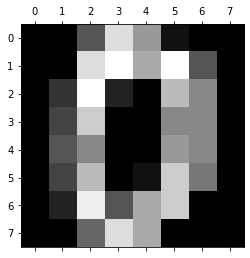

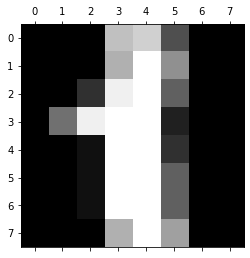

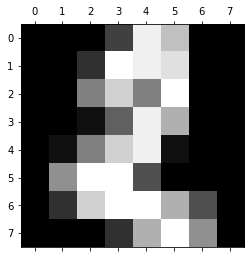

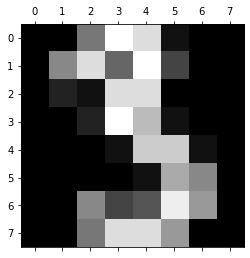

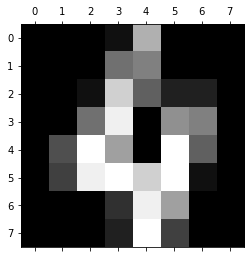

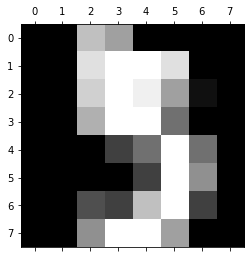

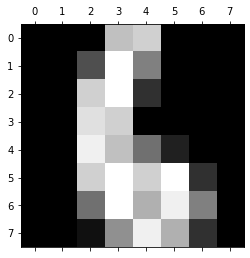

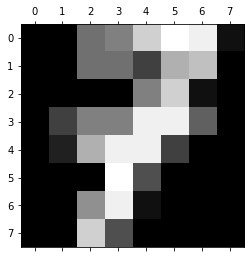

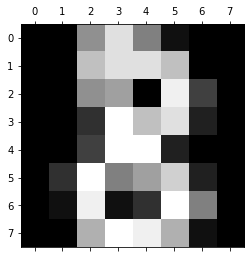

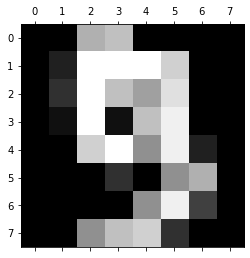

In [31]:
plt.gray()
for i in range(0, 10):
    plt.matshow(digits.images[i])
    
plt.show() 

Признаки и целевая переменная

In [9]:
X_digits = digits.data
Y_digits = digits.target

Количество цифр в данных

In [10]:
n_samples = len( X_digits )

Разобьем данные на обучающую выборку и тест в пропорции 90 / 10

In [11]:
split = int( n_samples * .9 )
split

1617

Обучающая выборка

In [12]:
X_train = X_digits[:split]
Y_train = Y_digits[:split]

Формируем тестовую выборку и обучаем модель knn

In [13]:
X_test = X_digits[split:]
Y_test = Y_digits[split:]

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)

In [19]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
knn.score( X_test, Y_test )

0.9611111111111111

<Figure size 432x288 with 0 Axes>

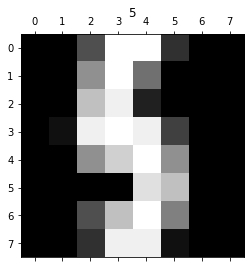

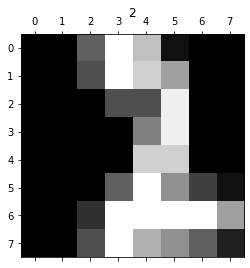

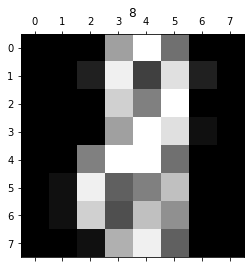

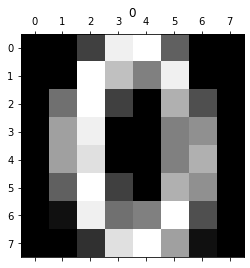

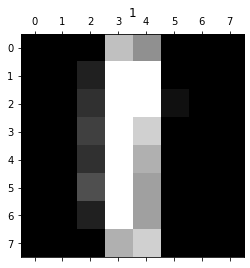

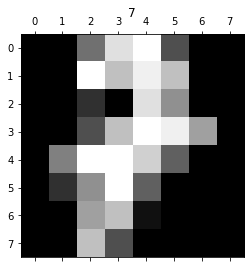

In [41]:
plt.gray()
for i in range(0, 6):
    plt.matshow(X_test[i].reshape(8,8))
    plt.title(int(knn.predict(X_test[i].reshape(1,-1))))
    
plt.show() 

# X_test[0].reshape(8,8)

<function matplotlib.pyplot.show(*args, **kw)>

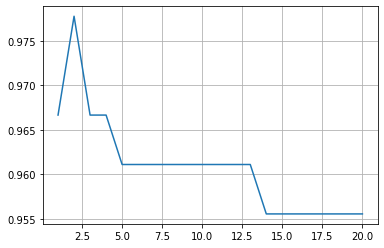

In [53]:
#plotting kNN - best result with 2 neighbors
scores = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    scores.append(knn.score(X_test, Y_test))
    
plt.plot(range(1,21), scores)
plt.grid()
plt.show